In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams["figure.dpi"] = 100
img_dir = "./images/"

In [2]:
def generate_rang_graph(v=100, e=200):
    G = nx.generators.random_graphs.gnm_random_graph(v, e, directed=False)
    return G

def draw_graph(G):
    #plt.subplot(121)
    #nx.draw(G, with_labels=True, font_weight='bold')
    plt.subplot(111)

    nx.draw_shell(G, with_labels=True, font_weight='bold')
    

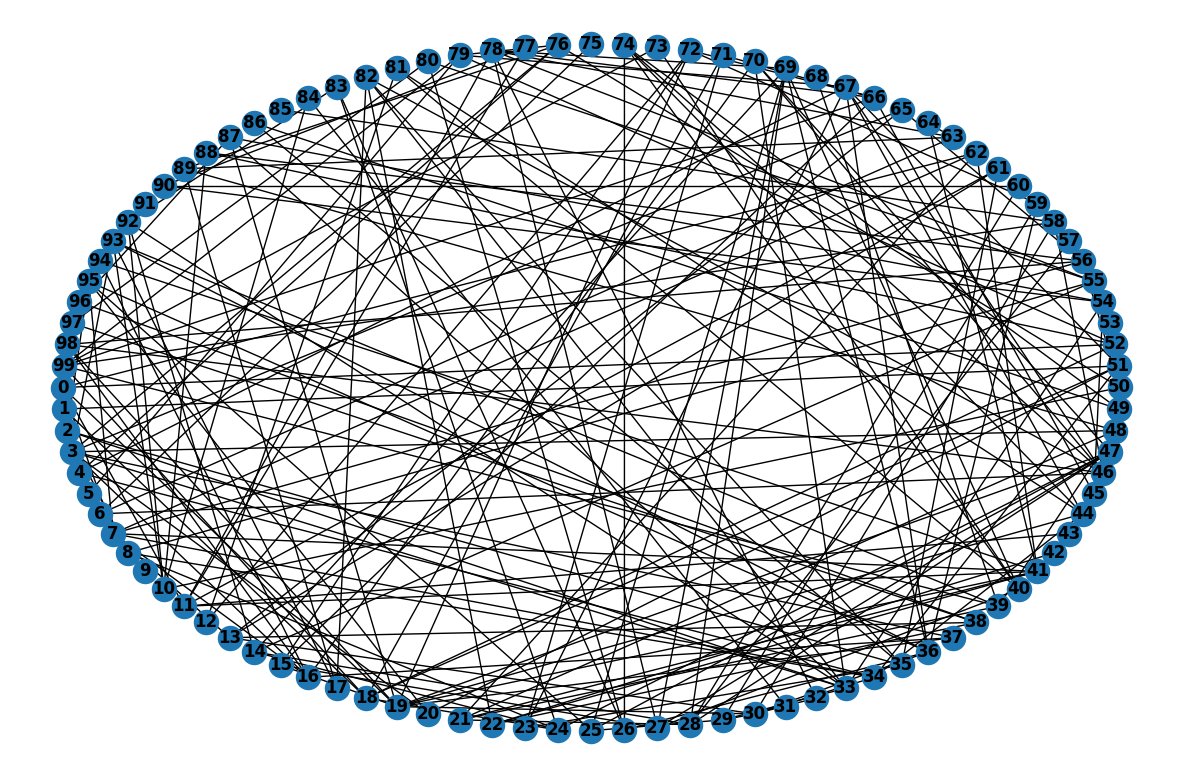

In [6]:
graph = generate_rang_graph()
draw_graph(graph)

# Adjacency Matrix

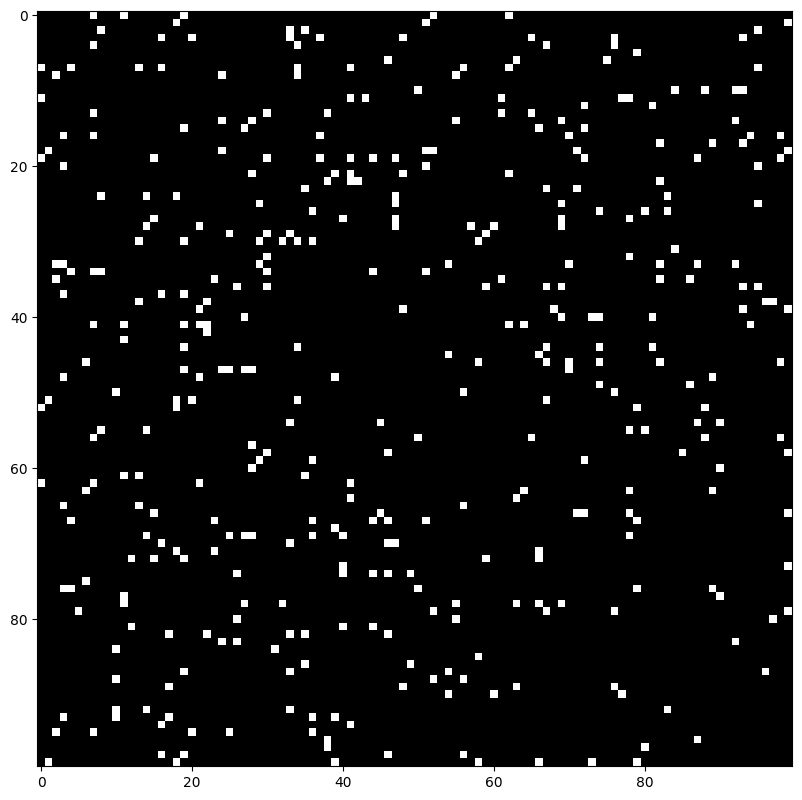

In [7]:
adj_matrix = nx.to_numpy_array(graph)
_ = plt.imshow(adj_matrix, cmap="gray")

# Adjacency list

In [8]:
adj_list = nx.to_dict_of_lists(graph)
# list(adj_list.values())[:3]
adj_list

{0: [19, 11, 7, 52, 62],
 1: [18, 51, 99],
 2: [33, 8, 95, 35],
 3: [65, 76, 33, 48, 93, 37, 16, 20],
 4: [67, 7, 76, 34],
 5: [79],
 6: [75, 63, 46],
 7: [41, 95, 4, 56, 16, 0, 13, 34, 62],
 8: [55, 24, 2, 34],
 9: [],
 10: [84, 88, 93, 50, 92],
 11: [78, 41, 43, 0, 77, 61],
 12: [81, 72],
 13: [65, 61, 30, 7, 38],
 14: [55, 24, 28, 69, 92],
 15: [66, 27, 72, 19],
 16: [98, 7, 94, 37, 70, 3],
 17: [89, 82, 93],
 18: [1, 52, 51, 71, 99, 24],
 19: [98, 37, 30, 0, 41, 44, 87, 47, 15, 72],
 20: [95, 51, 3],
 21: [41, 48, 28, 39, 62],
 22: [42, 41, 82, 38],
 23: [67, 35, 71],
 24: [14, 8, 47, 83, 18],
 25: [29, 47, 95, 69],
 26: [80, 83, 36, 74],
 27: [40, 47, 69, 15, 78],
 28: [47, 57, 14, 69, 60, 21],
 29: [25, 30, 59, 33],
 30: [19, 29, 34, 36, 13, 58, 32],
 31: [84],
 32: [78, 30],
 33: [82, 2, 70, 54, 3, 87, 92, 29],
 34: [44, 30, 51, 8, 7, 4],
 35: [82, 61, 23, 86, 2],
 36: [95, 59, 30, 67, 69, 26, 93],
 37: [19, 16, 3],
 38: [96, 97, 22, 13],
 39: [68, 99, 48, 93, 21],
 40: [73, 74,

# DFS and Connected Components

In [41]:
connected_components = []

not_visited = np.array(graph.nodes)

while len(not_visited) != 0:
    node = not_visited[0]
    not_visited = not_visited[1:]
    dfs_search = list(nx.algorithms.traversal.depth_first_search.dfs_edges(graph, source=node))
    dfs_nodes = list(map( lambda x: x[1], dfs_search))
    conn_comp = [node]
    conn_comp.extend(dfs_nodes)
    conn_comp.sort()
    connected_components.append(conn_comp)
    mask = list(map(lambda x: x not in conn_comp, not_visited))
    not_visited = not_visited[mask]

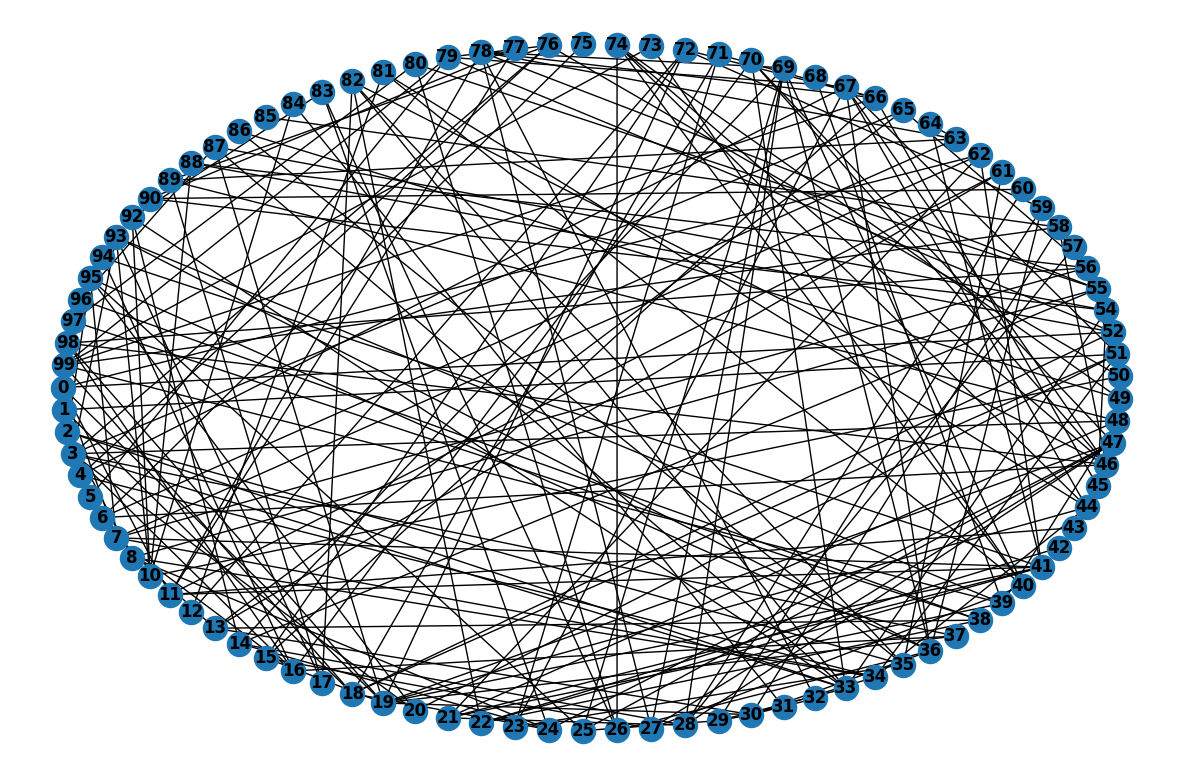

In [40]:
draw_graph(graph.subgraph(connected_components[0]))

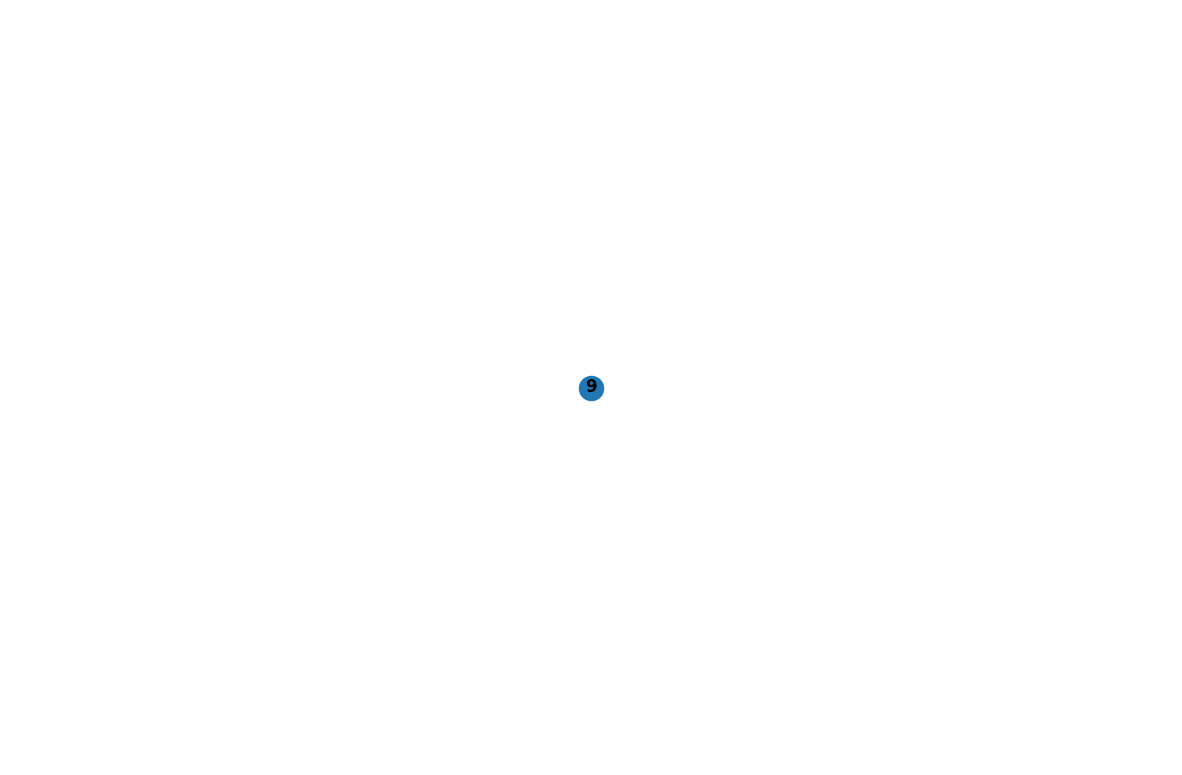

In [42]:
draw_graph(graph.subgraph(connected_components[1]))

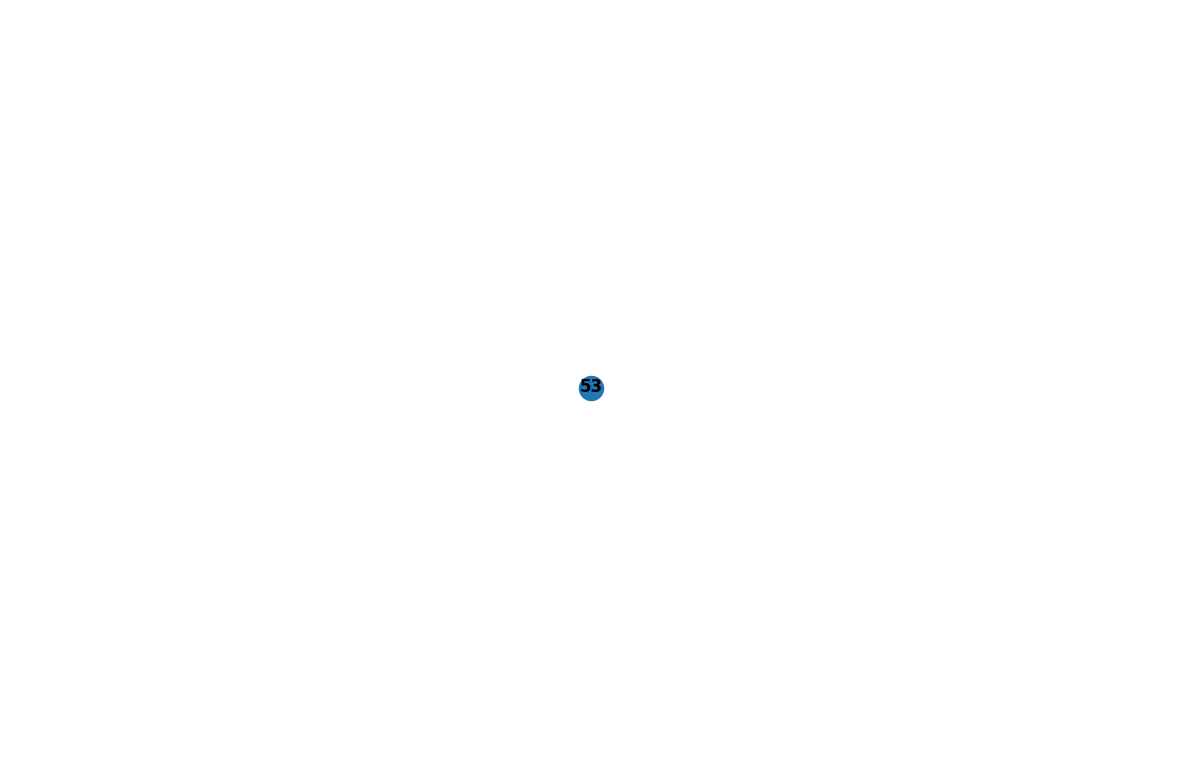

In [46]:
draw_graph(graph.subgraph(connected_components[2]))

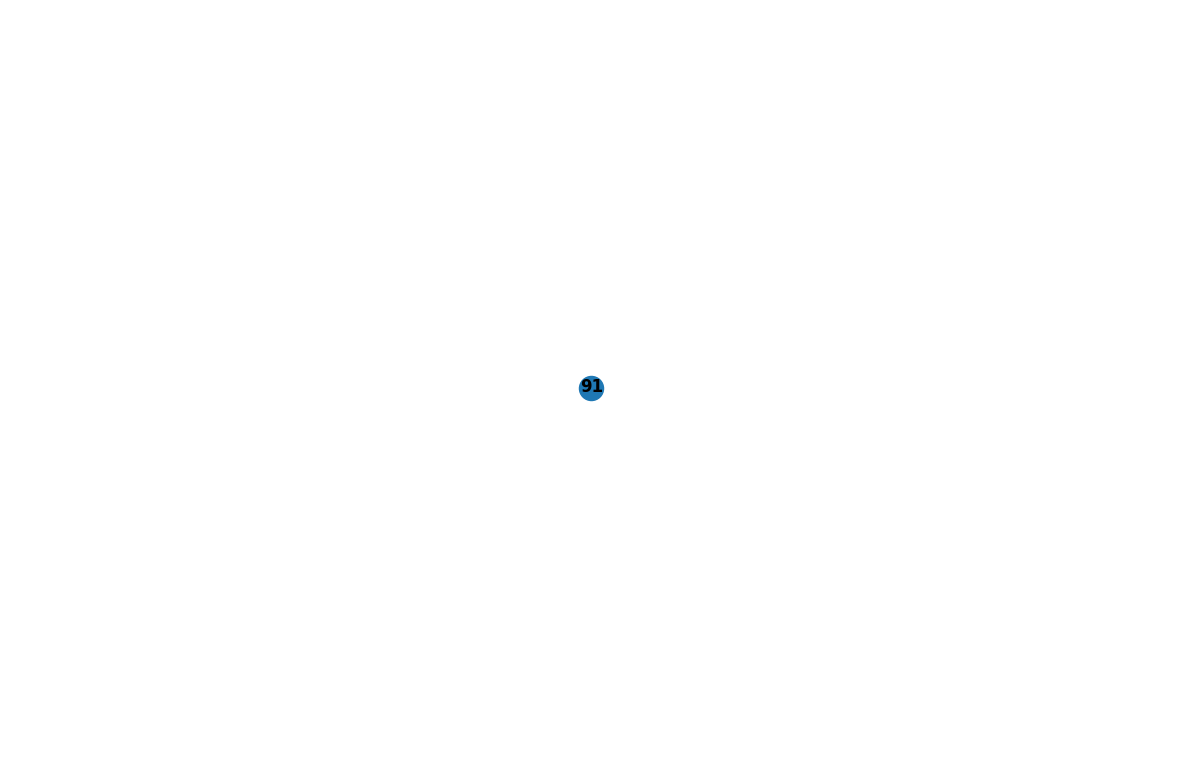

In [47]:
draw_graph(graph.subgraph(connected_components[3]))

# BFS

In [49]:
list(nx.traversal.breadth_first_search.bfs_edges(graph, 1, 12))

[(1, 18),
 (1, 51),
 (1, 99),
 (18, 52),
 (18, 71),
 (18, 24),
 (51, 67),
 (51, 20),
 (51, 34),
 (99, 73),
 (99, 66),
 (99, 58),
 (99, 39),
 (99, 79),
 (52, 0),
 (52, 88),
 (71, 23),
 (24, 14),
 (24, 8),
 (24, 47),
 (24, 83),
 (67, 4),
 (67, 44),
 (67, 36),
 (67, 46),
 (20, 95),
 (20, 3),
 (34, 30),
 (34, 7),
 (73, 40),
 (66, 72),
 (66, 15),
 (66, 45),
 (66, 78),
 (58, 85),
 (39, 68),
 (39, 48),
 (39, 93),
 (39, 21),
 (79, 5),
 (79, 76),
 (0, 19),
 (0, 11),
 (0, 62),
 (88, 56),
 (88, 10),
 (23, 35),
 (14, 55),
 (14, 28),
 (14, 69),
 (14, 92),
 (8, 2),
 (47, 25),
 (47, 70),
 (47, 27),
 (83, 26),
 (44, 74),
 (44, 81),
 (36, 59),
 (46, 98),
 (46, 6),
 (46, 82),
 (3, 65),
 (3, 33),
 (3, 37),
 (3, 16),
 (30, 29),
 (30, 13),
 (30, 32),
 (7, 41),
 (72, 12),
 (45, 54),
 (78, 63),
 (48, 89),
 (93, 17),
 (76, 50),
 (19, 87),
 (11, 43),
 (11, 77),
 (11, 61),
 (10, 84),
 (35, 86),
 (55, 80),
 (28, 57),
 (28, 60),
 (74, 49),
 (6, 75),
 (82, 22),
 (16, 94),
 (13, 38),
 (41, 64),
 (54, 90),
 (87, 96)